Dataset  : Spanish Wine Quality from Kaggle

Objective : Dataset ini berkaitan dengan varian merah dari anggur Spanyol. Dataset ini menggambarkan beberapa metrik popularitas dan deskripsi yang mempengaruhi kualitasnya. *[url](https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset/data)* Dataset ini berisi 7500 jenis anggur merah yang berbeda dari Spanyol dengan 11 fitur yang menggambarkan harga, rating, dan bahkan beberapa deskripsi rasa.

In [1]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading spanish-wine-quality-dataset.zip to .\spanish-wine-quality-dataset


100%|██████████| 46.4k/46.4k [00:00<00:00, 1.18MB/s]

# 2. Import Library

In [3]:
# Untuk membaca dan membuat dataframe
import pandas as pd

# Untuk menghitung perhitungan matematika
import numpy as np

# Untuk membuat visualisasi data pada EDA
import seaborn as sns
import matplotlib.pyplot as plt

#Untuk mengabaikan peringatan pada visualisasi
import warnings
warnings.filterwarnings("ignore")

#save model
import pickle

# preprocessing
from scipy import stats
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

#model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

#Hyperparam tuning
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV

#transform scale numerik dan encode categoric
from sklearn.compose import ColumnTransformer

#pipeline
from sklearn.pipeline import Pipeline

#cross validation
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# 3. Data Loading

In [2]:
# meload atau membaca file csv
data = pd.read_csv('wines_SPA.csv')

In [3]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
winery,Teso La Monja,Artadi,Vega Sicilia,Vega Sicilia,Vega Sicilia,Vega Sicilia,Vega Sicilia,Vega Sicilia,Vega Sicilia,Vega Sicilia
wine,Tinto,Vina El Pison,Unico,Unico,Unico,Unico,Unico,Unico,Unico Reserva Especial Edicion,Unico
year,2013,2018,2009,1999,1996,1998,2010,1995,2015,2011
rating,4.9,4.9,4.8,4.8,4.8,4.8,4.8,4.8,4.8,4.8
num_reviews,58,31,1793,1705,1309,1209,1201,926,643,630
country,Espana,Espana,Espana,Espana,Espana,Espana,Espana,Espana,Espana,Espana
region,Toro,Vino de Espana,Ribera del Duero,Ribera del Duero,Ribera del Duero,Ribera del Duero,Ribera del Duero,Ribera del Duero,Ribera del Duero,Ribera del Duero
price,995.0,313.5,324.95,692.96,778.06,490.0,349.0,810.89,345.0,315.0
type,Toro Red,Tempranillo,Ribera Del Duero Red,Ribera Del Duero Red,Ribera Del Duero Red,Ribera Del Duero Red,Ribera Del Duero Red,Ribera Del Duero Red,Ribera Del Duero Red,Ribera Del Duero Red
body,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [23]:
data.tail(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
7490,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90,NaN,NaN,NaN
7491,Ramon Bilbao,Mirto,2011,4.2,402,Espana,Rioja,28.53,Rioja Red,4.0,3.0
7492,Matsu,El Viejo,2019,4.2,400,Espana,Toro,27.89,Toro Red,5.0,3.0
7493,Artadi,Valdegines,2016,4.2,398,Espana,Vino de Espana,48.96,Tempranillo,4.0,2.0
7494,Contino,Rioja Graciano,2011,4.2,395,Espana,Rioja,61.94,Rioja Red,4.0,3.0
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
7499,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0


*Penjelasan Tiap Kolom*
* `winery`: Nama penghasil wine
* `wine`: Nama wine
* `year`: Tahun di mana wine dibuat
* `rating`: Penilaian rata-rata yang diberikan kepada wine oleh pengguna [dari 1-5]
* `num_reviews`: Jumlah pengguna yang mengulas wine tersebut
* `country`: Negara asal [Spanyol]
* `region`: Daerah wine
* `price`: Harga dalam euro [€]
* `type`: Varietas wine
* `body`: Skor badan, yang didefinisikan sebagai kekayaan dan berat wine di mulut Anda [dari 1-5]
* `acidity`: Skor keasaman, yang didefinisikan sebagai "kerut" atau keasaman wine; itulah yang membuat wine menyegarkan dan membuat lidah Anda ingin melanjutkan teguk berikutnya [dari 1-5]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [25]:
data.nunique()

winery          480
wine            847
year             71
rating            8
num_reviews     817
country           1
region           76
price          1292
type             21
body              4
acidity           3
dtype: int64

In [26]:
data.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [27]:
# menghitung persentase pada kolom yang memiliki nilai NAN
pers_year_mv = 100 * data["year"].isnull().sum()/len(data)
pers_type_mv = 100 * data["type"].isnull().sum()/len(data)
pers_body_mv = 100 * data["body"].isnull().sum()/len(data)
pers_acidity_mv = 100 * data["acidity"].isnull().sum()/len(data)
print (f"Persentase Missing Value 'Year'    : {pers_year_mv:.2f}%")
print (f"Persentase Missing Value 'Type'    : {pers_type_mv:.2f}%")
print (f"Persentase Missing Value 'Body'    : {pers_body_mv:.2f}%")
print (f"Persentase Missing Value 'Acidity' : {pers_acidity_mv:.2f}%")

Persentase Missing Value 'Year'    : 0.03%
Persentase Missing Value 'Type'    : 7.27%
Persentase Missing Value 'Body'    : 15.59%
Persentase Missing Value 'Acidity' : 15.59%


persentase missing value pada kolom year <5% saya memutuskan untuk menghapunya dan persentase missing value pada kolom type, body, dan acidity > 5% sehingga akan dilakukan imputasi mean/median tergantung dari distribusi normal atau skewed

In [28]:
data.duplicated().sum()

5452

In [29]:
 Dup_Rows = data[data.duplicated()]
 
 print("Duplicate Rows : n {}".format(Dup_Rows))

Duplicate Rows : n                     winery             wine  year  rating  num_reviews  \
1800        Bodega Tameran       Marmajuelo  2020     4.3           27   
2036        Ramon do Casar       Treixadura  2020     4.2          407   
2039              Binigrau           Nounat  2020     4.2          404   
2050          La Vicalanda          Reserva  2015     4.2          420   
2051       Enrique Mendoza       Santa Rosa  2017     4.2          420   
...                    ...              ...   ...     ...          ...   
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

     country            region  price                  type  body  acidity  
1800  Espana   

Setelah dilihat dari 5452 rows yang duplikat, tidak secara keseluruhan memiliki value yang duplikat tetapi hanya pada kolom tertentu saja sehingga saya memutuskan untuk tidak menghapusnya

In [30]:
data.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [38]:
# menduplikat dataset asli dan mendrop kolom country
new_data = data.drop(['country'], axis = 1).copy()

kolom 'country' di drop karena hanya satu informasi yaitu 'Espana', sesuai judul dataset Spanish Wine sehingga hanya seputar wine yang ada dinegara Spanish(Spanyol)

In [39]:
# terdapat N.V. pada kolom year saat saya mengubah tipe data 'year', sehingga saya memutuska mengubah menjadi NAN
new_data['year']=new_data['year'].replace("N.V.",np.NaN)
new_data = new_data.dropna(subset=['year']) #menghapus missing value yang hanya ada di kolom year

In [40]:
# mengubah type data year
new_data['year'] = new_data['year'].astype('int')

## - Apakah ada hubungan antara Price dan Rating?

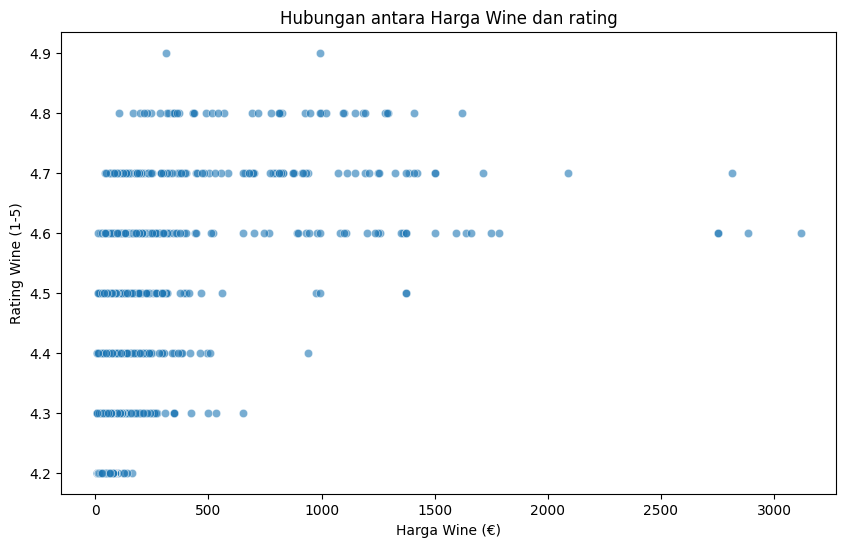

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_data, x='price', y='rating', alpha=0.6)
plt.title('Hubungan antara Harga Wine dan rating')
plt.xlabel('Harga Wine (€)')
plt.ylabel('Rating Wine (1-5)')
plt.show()

*Kesimpulan*
* Setelah saya lihat, harga wine > 3000€ dengan rating 4.6, sedangkan terdapat harga wine < 1000€ memiliki rating 4.9. Sehingga saya menyimpulkan harga wine yang mahal tidak memiliki hubungan dengan rating yang tinggi.

## - Apakah harga rata-rata wine yang tinggi selalu mengindikasikan kualitas yang lebih tinggi, atau ada produsen yang menetapkan harga tinggi tanpa alasan yang jelas?

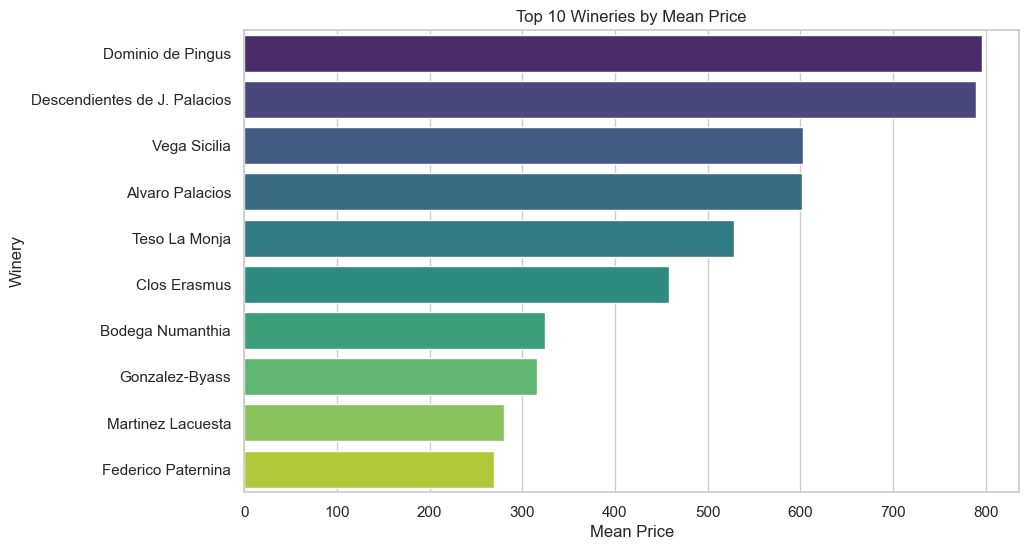

In [16]:
winery_price_mean = new_data.groupby('winery')['price'].mean().sort_values(ascending=False).head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=winery_price_mean.values, y=winery_price_mean.index, palette="viridis")

# Set labels and title
ax.set(xlabel='Mean Price', ylabel='Winery')
plt.title('Top 10 Wineries by Mean Price')

# Show the plot
plt.show()

In [17]:
print(new_data.groupby('winery').agg(mean_price=('price', 'mean')))

                                  mean_price
winery                                      
A Coroa                            23.700000
AGE                               230.000000
Aalto                              70.838731
Abadal                             21.633333
Abadia Retuerta                    68.975926
...                                      ...
Xaloc                              35.400000
Ysios                              77.213333
Zarate                             33.670000
Zifar                              24.225000
l'Infernal Combier Fischer Gerin   69.000000

[445 rows x 1 columns]


*Kesimpulan*
* Dari visualisasi ini, terdapat 10 produsen wine memiliki harga rata-rata yang lebih tinggi daripada yang lain. Saya menyimpilkan bahwa produsen-produsen tersebut mungkin menghasilkan wine dengan kualitas yang lebih tinggi atau memiliki reputasi yang baik di pasar atau mungkin tergantung dari usia wine tersebut, yang memungkinkan mereka untuk menetapkan harga yang lebih tinggi.

## - Bagaimana Persebaran tahun anggur yang dihasilkan?

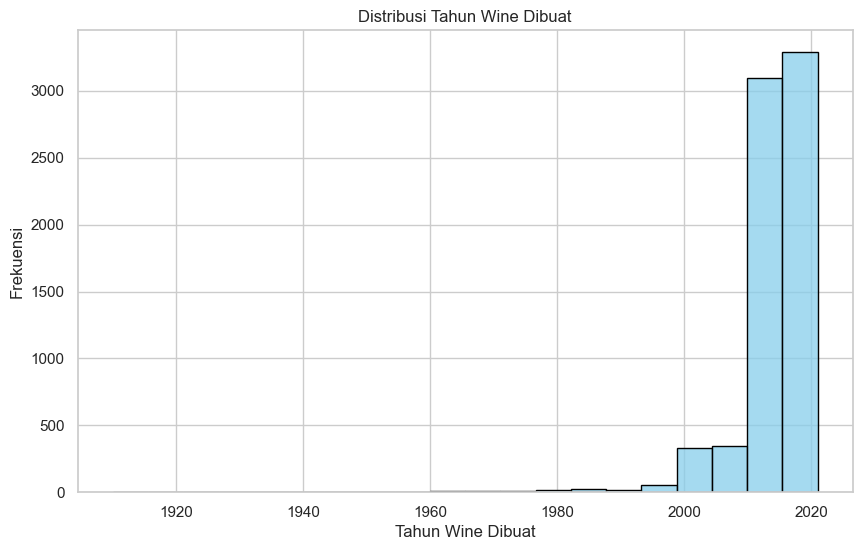

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Tahun Wine Dibuat')
plt.xlabel('Tahun Wine Dibuat')
plt.ylabel('Frekuensi')
plt.show()

*Kesimpulan*
* Mulai dari tahun 2000 - 2010 wine yang dihasilkan masih dibawah 500, tetapi pada tahun 2011 - 2020 wine yang dihasilkan mengalami kenaikan diatas 3000. Sehingga saya menyimpulkan di negara Spanyol wine yang dihasilkan dibawah tahun 2000 sangat sedikit tetapi mulai dari tahun 2011 - 2020 wine yang dihasilkan mencapai lebih dari 3000

## - Apakah ada pengaruh antara Tahun pembuatan wine dengan Price?

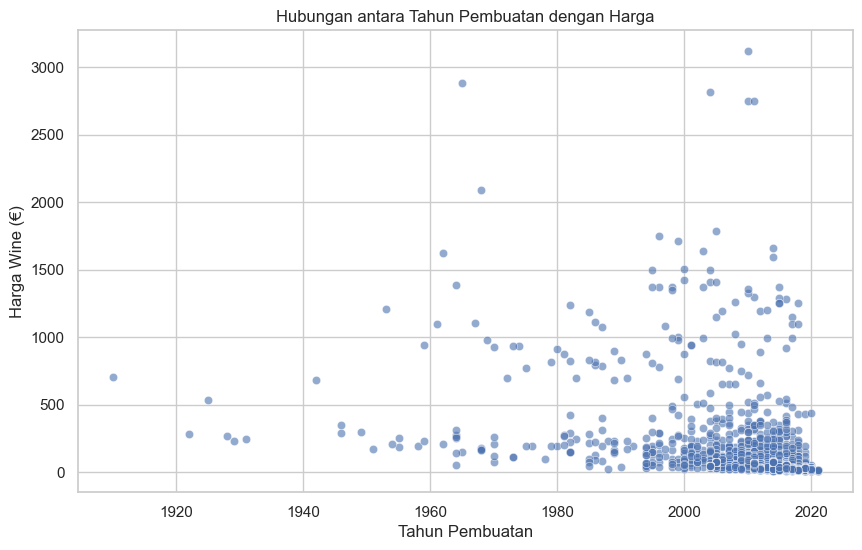

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_data, x='year', y='price', alpha=0.6)
plt.title('Hubungan antara Tahun Pembuatan dengan Harga')
plt.xlabel('Tahun Pembuatan')
plt.ylabel('Harga Wine (€)')
plt.show()

*Kesimpulan*
* Setelah dilihat, ternyata tahun pembuatan tidak begitu berpengaruh terhadap harga. Sehingga walaupun usia wine tersebut sangat tua belum tentu harganya mahal.

## Apakah ada perbedaan antara rata - rata harga dengan jenis wine?

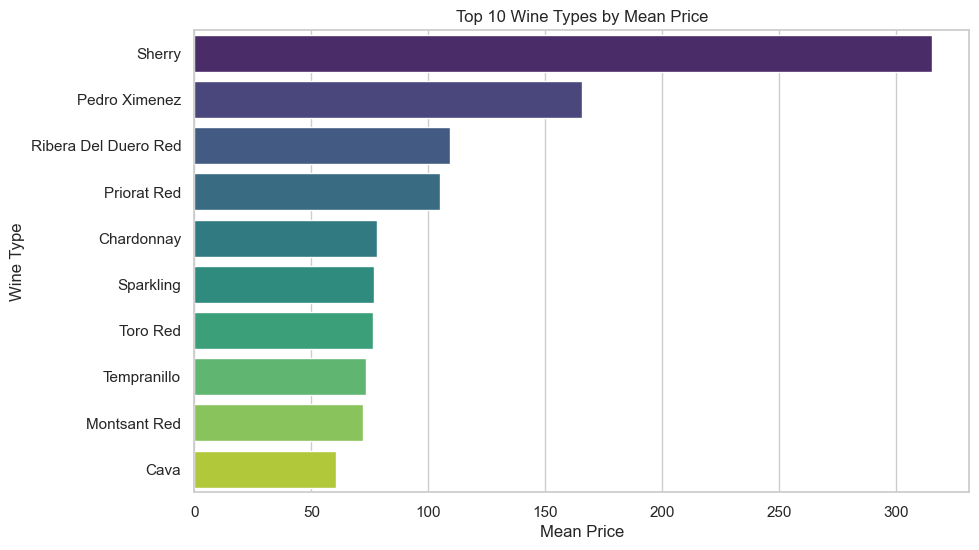

In [20]:
type_price_mean = new_data.groupby('type')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=type_price_mean.values, y=type_price_mean.index, palette="viridis")
ax.set(xlabel='Mean Price', ylabel='Wine Type')
plt.title('Top 10 Wine Types by Mean Price')
plt.show()

In [21]:
print(new_data.groupby('type').agg(mean_price=('price', 'mean')))

                      mean_price
type                            
Albarino               18.114673
Cabernet Sauvignon     51.090000
Cava                   60.547576
Chardonnay             78.114615
Grenache               57.506286
Mencia                 21.244170
Monastrell             38.637778
Montsant Red           72.024118
Pedro Ximenez         165.625926
Priorat Red           104.794475
Red                    37.531400
Ribera Del Duero Red  109.227087
Rioja Red              43.968594
Rioja White            48.854748
Sauvignon Blanc        12.975000
Sherry                315.425000
Sparkling              76.794000
Syrah                  43.176072
Tempranillo            73.529117
Toro Red               76.522264
Verdejo                34.261852


*Kesimpulan*
* Dari visualisasi ini, kita dapat menyimpulkan bahwa ada perbedaan yang signifikan dalam harga rata-rata antara jenis wine. Beberapa jenis wine mungkin memiliki harga yang lebih tinggi daripada yang lain, dan ini bisa disebabkan oleh berbagai faktor seperti popularitas, kualitas, atau kelangkaan jenis wine tersebut.

# 5. Feature Engineering

## A. Feature Selection

### - Analisis Korelasi Kategorikal Data

In [22]:
# membuat variable baru untuk cek korelasi kategorikal
cat_correlation = new_data[['winery', 'wine', 'rating', 'region', 'type', 'body', 'acidity', 'price']]
cat_correlation.head(5)

,winery,wine,rating,region,type,body,acidity,price
0,Teso La Monja,Tinto,4.9,Toro,Toro Red,5.0,3.0,995.00
1,Artadi,Vina El Pison,4.9,Vino de Espana,Tempranillo,4.0,2.0,313.50
2,Vega Sicilia,Unico,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,324.95
3,Vega Sicilia,Unico,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,692.96
4,Vega Sicilia,Unico,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,778.06


In [23]:
# hapus nan pada variabel kategorikal
cat_correlation = cat_correlation.dropna()

In [24]:
sekor = []

# Memanggil fungsi untuk setiap kolom yang ingin dianalisis
for column in cat_correlation:
    kendall_corr, p_value = stats.kendalltau(cat_correlation['price'], cat_correlation[column])
    sekor.append((column, kendall_corr, p_value))

for i in sekor:
    column, kendall_corr, p_value = i
    print(f"{column}:\nKorelasi Kendall: {kendall_corr}\nP-Value: {p_value}\n")

winery:
Korelasi Kendall: 0.10790455639347696
P-Value: 9.827456500346025e-35

wine:
Korelasi Kendall: -0.11294406258872652
P-Value: 7.430245668289158e-38

rating:
Korelasi Kendall: 0.38882904540579183
P-Value: 0.0

region:
Korelasi Kendall: 0.07523073497352699
P-Value: 1.0299531325412613e-15

type:
Korelasi Kendall: 0.08408016157439097
P-Value: 4.304764301180688e-19

body:
Korelasi Kendall: 0.2941049449837159
P-Value: 4.5469852980765915e-181

acidity:
Korelasi Kendall: -0.13472421020945433
P-Value: 3.917074827396138e-37

price:
Korelasi Kendall: 1.0
P-Value: 0.0



*Kesimpulan*

Semakin mendekati 1 atau -1 korelasinya semakin baik, dan semakin p-value mendekati 0 semakin signifikan.

Menurut pertimbangan saya(Domain Knowledge) : 
* `rating`  : Memiliki korelasi positif yang cukup kuat (0.388) dengan 'price'. Ini menunjukkan bahwa semakin tinggi rating, semakin tinggi juga harga  wine.
* `body`    : Memiliki korelasi positif yang kuat (0.294) dengan 'price'. Ini menunjukkan bahwa semakin tinggi body wine, semakin tinggi juga harga wine.
* `acidity` : Meskipun memiliki korelasi negatif, nilainya cukup kuat (-0.134). Ini menunjukkan bahwa semakin tinggi tingkat acidity, harga wine cenderung lebih rendah.

### - Analisis Korelasi Numerikal Data

In [25]:
num_data = new_data[['year', 'num_reviews', 'price']]
num_data.head(5)

,year,num_reviews,price
0,2013,58,995.00
1,2018,31,313.50
2,2009,1793,324.95
3,1999,1705,692.96
4,1996,1309,778.06


In [26]:
num_data = num_data.dropna()

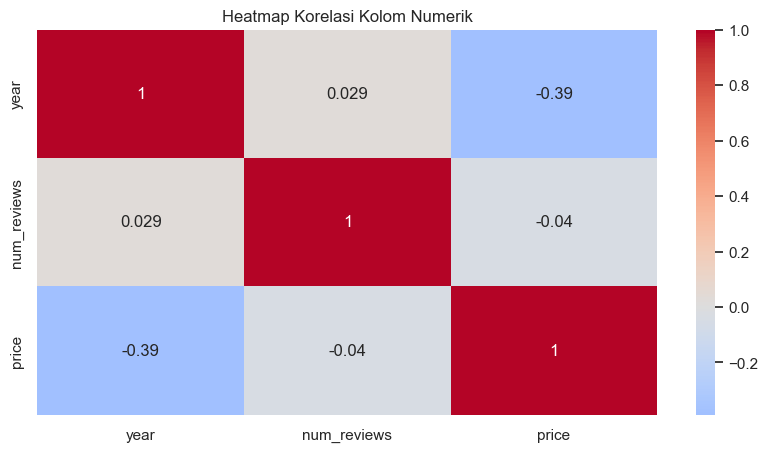

In [27]:
# korelasi numerik dengan default pearson
num_correlation = num_data.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(num_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Kolom Numerik')
plt.show()

*Kesimpulan*

Menurut pertimbangan saya (Domain Knowledge) :
* `year`: Memiliki korelasi negatif yang cukup kuat (-0.39) dengan 'price'. Ini menunjukkan bahwa semakin rendah tahun pembuatan wine, semakin tinggi harga wine.

* `num_reviews`: Memiliki korelasi yang hampir mendekati nol (-0.04) dengan 'price'. Ini menunjukkan bahwa tidak ada korelasi yang kuat antara jumlah ulasan dan harga wine.

In [28]:
# membuat variabel baru untuk kolom yang saya gunakan
select_ftr = new_data[['rating', 'body', 'acidity', 'year', 'price']].copy()
select_ftr.head(5)

,rating,body,acidity,year,price
0,4.9,5.0,3.0,2013,995.00
1,4.9,4.0,2.0,2018,313.50
2,4.8,5.0,3.0,2009,324.95
3,4.8,5.0,3.0,1999,692.96
4,4.8,5.0,3.0,1996,778.06


## B. Analisis Cardinality

In [29]:
# membuat variabel data kategorikal
cat_cols = select_ftr[['rating', 'body', 'acidity']]

In [30]:
for col in cat_cols:
  print(f'cardinality kolom {col}:', cat_cols[col].nunique())

cardinality kolom rating: 8
cardinality kolom body: 4
cardinality kolom acidity: 3


Saya tidak melakukan central tendency karena cardinality nya tidak diatas 20

In [31]:
# Menentukan/memisahkan fitur dan target(Splitting).
X = select_ftr.drop('price', axis=1)
y = select_ftr['price']
X

,rating,body,acidity,year
0,4.9,5.0,3.0,2013
1,4.9,4.0,2.0,2018
2,4.8,5.0,3.0,2009
3,4.8,5.0,3.0,1999
4,4.8,5.0,3.0,1996
...,...,...,...,...
7495,4.2,4.0,3.0,2016
7496,4.2,4.0,3.0,2018
7497,4.2,4.0,3.0,2017
7498,4.2,5.0,3.0,2011


In [32]:
# buat menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (5768, 4)
Test Size  :  (1442, 4)


In [33]:
# cetak shape/ukuran data
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (5768, 4)
Test Size  :  (1442, 4)
Train Size :  (5768,)
Test Size  :  (1442,)


## C. Handling Missing Value

In [34]:
# handle MV dalam kolom body dan acidity
X_train.isnull().sum()

rating       0
body       923
acidity    923
year         0
dtype: int64

In [35]:
X_train

,rating,body,acidity,year
5886,4.2,NaN,NaN,2020
7016,4.2,4.0,3.0,2011
2307,4.2,4.0,3.0,2018
3443,4.2,4.0,3.0,2011
2043,4.2,4.0,3.0,2011
...,...,...,...,...
1217,4.3,5.0,3.0,2016
3574,4.2,4.0,3.0,2005
1384,4.3,4.0,2.0,2001
4805,4.2,3.0,3.0,2018


In [36]:
# Membuat SimpleImputer untuk imputasi modus
imputer = SimpleImputer(strategy='most_frequent')

# Melakukan imputasi modus pada data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Menampilkan data setelah imputasi
X_train_imputed

array([[4.200e+00, 4.000e+00, 3.000e+00, 2.020e+03],
       [4.200e+00, 4.000e+00, 3.000e+00, 2.011e+03],
       [4.200e+00, 4.000e+00, 3.000e+00, 2.018e+03],
       ...,
       [4.300e+00, 4.000e+00, 2.000e+00, 2.001e+03],
       [4.200e+00, 3.000e+00, 3.000e+00, 2.018e+03],
       [4.300e+00, 4.000e+00, 3.000e+00, 2.004e+03]])

In [37]:
X_train_imputed = pd.DataFrame(X_train_imputed)
change = {0:'rating', 1:'body', 2:'acidity', 3:'year'} # Memberi nama untuk kolom, beri nama price
X_train_imputed = X_train_imputed.rename(columns = change)
X_train_imputed.head(5)

,rating,body,acidity,year
0,4.2,4.0,3.0,2020.0
1,4.2,4.0,3.0,2011.0
2,4.2,4.0,3.0,2018.0
3,4.2,4.0,3.0,2011.0
4,4.2,4.0,3.0,2011.0


In [38]:
X_train_imputed.isnull().sum()

rating     0
body       0
acidity    0
year       0
dtype: int64

In [39]:
X_test_imputed = pd.DataFrame(X_test_imputed)
change = {0:'rating', 1:'body', 2:'acidity', 3:'year'} # Memberi nama untuk kolom, beri nama price
X_test_imputed = X_test_imputed.rename(columns = change)
X_test_imputed.head(5)

,rating,body,acidity,year
0,4.2,4.0,3.0,2017.0
1,4.2,4.0,3.0,2004.0
2,4.2,5.0,3.0,2016.0
3,4.3,4.0,3.0,2013.0
4,4.2,4.0,3.0,2015.0


In [40]:
X_test_imputed.isnull().sum()

rating     0
body       0
acidity    0
year       0
dtype: int64

## C. Handling Outlier

In [41]:
X_train_imputed['year'].skew() # year adalah data numerik maka terpilih
# jika data categorikal, maka tidak akan terdapat outlier

-4.906236000537981

`year` berdistribusi tidak normal(skewed)

In [42]:
# caping outlier

winsoriser_year = Winsorizer(capping_method='iqr', # iqr untuk skewness
                             tail='both', #capping 2 sisi outlier
                             fold=3, # rumus gaussian
                             variables=['year'])

X_train_capped = winsoriser_year.fit_transform(X_train_imputed)
X_test_capped = winsoriser_year.transform(X_test_imputed)

In [43]:
# Buat function membuat histogram dan boxplot, untuk lihat perubahan setelah capping
def capping_plot(data, variable):
    # Definisikan figure size
    plt.figure(figsize=(16, 4))

    # membuat Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # membuat Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

Year X_train - Sebelum Capping


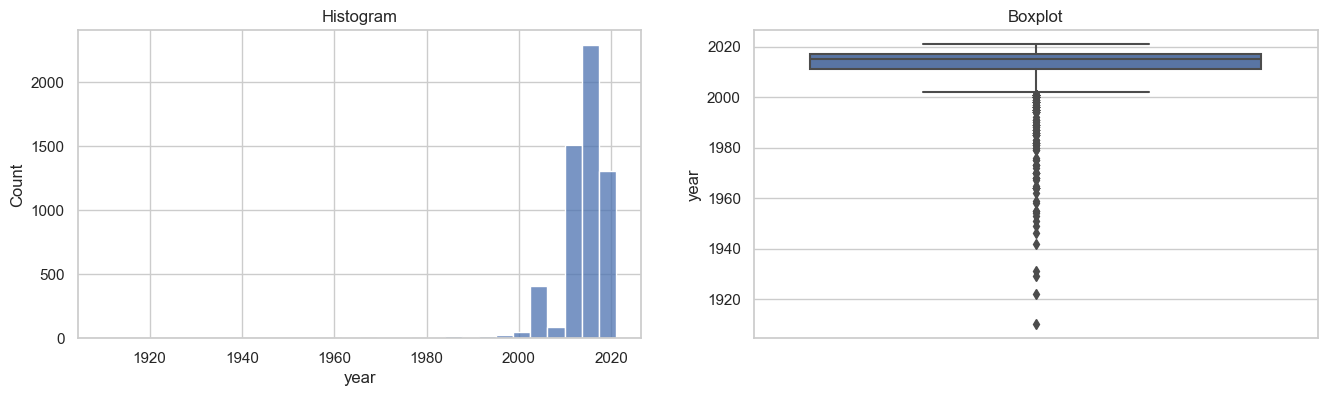

Year X_train- Setelah Capping


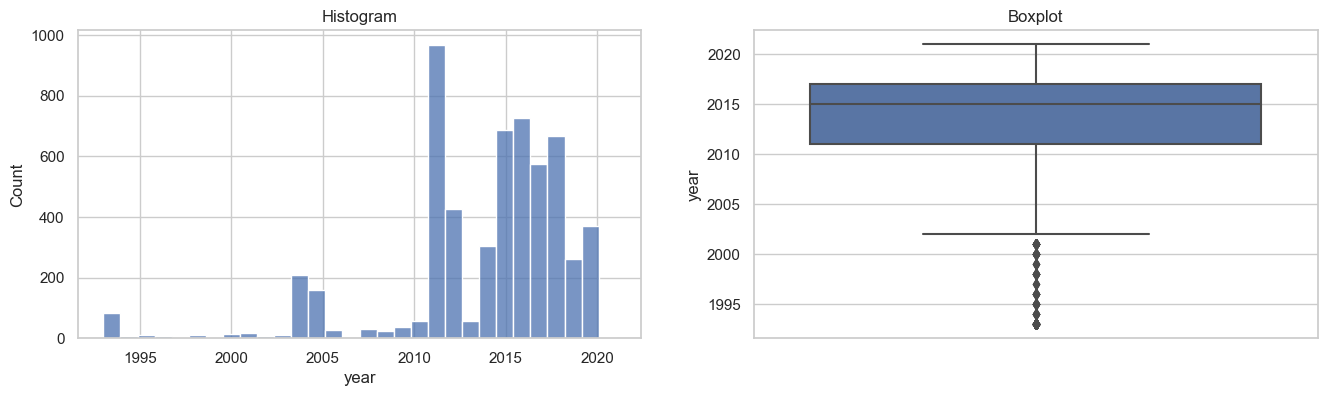

Year X_test - Sebelum Capping


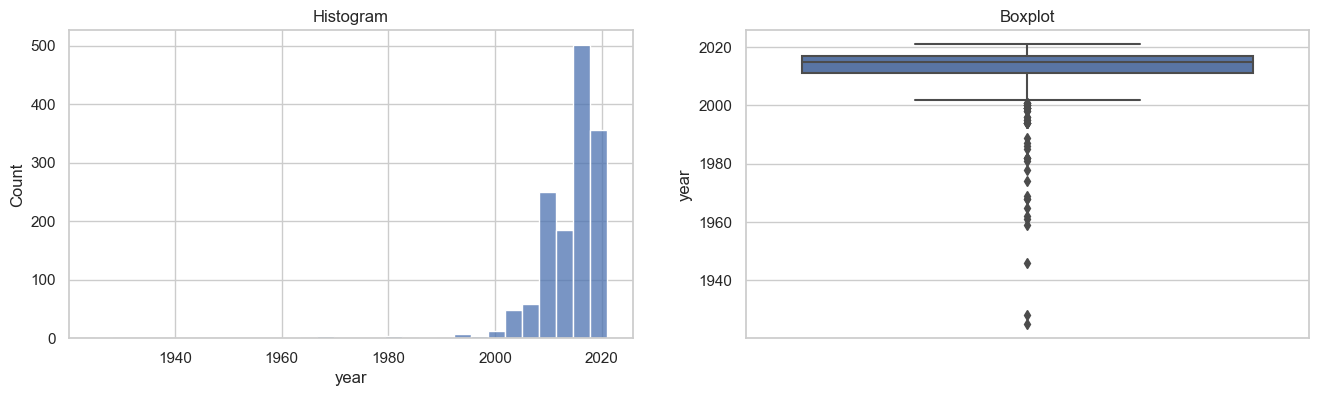

Year X_test - Setelah Capping


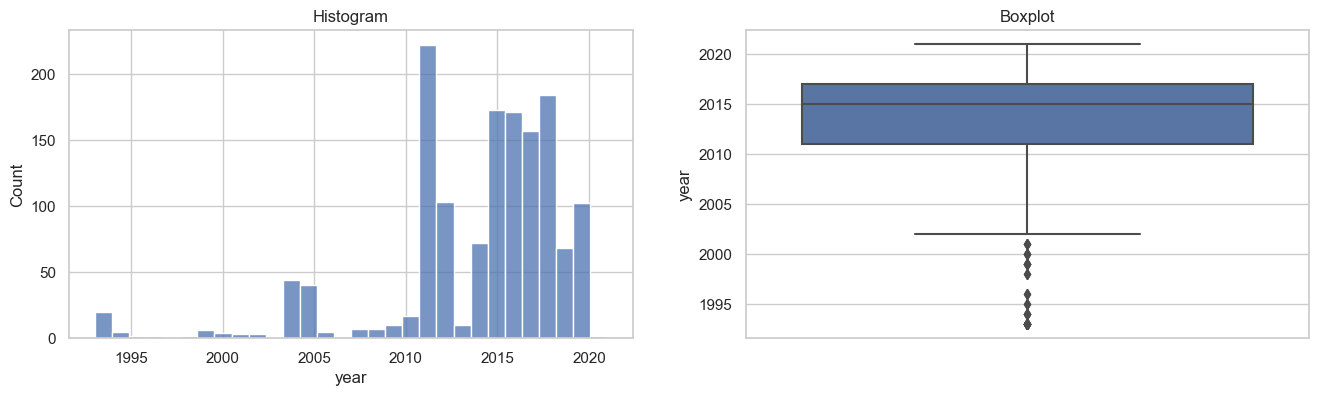

In [44]:
print('Year X_train - Sebelum Capping')
capping_plot(X_train_imputed, 'year')

print('Year X_train- Setelah Capping')
capping_plot(X_train_capped, 'year')

print('Year X_test - Sebelum Capping')
capping_plot(X_test_imputed, 'year')

print('Year X_test - Setelah Capping')
capping_plot(X_test_capped, 'year')

In [45]:
print(X_train_capped['year'].skew())
print(X_test_capped['year'].skew())

-1.6414984489138258
-1.715150841792137


Setelah dilakukan capping ternyata data masih berdistribusi tidak normal (skewed)

# 6. Model Definition

In [46]:
num_cols = ['year']
cat_cols = ['rating','body','acidity']

In [47]:
scaler = MinMaxScaler()
encoding = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=20)
model = LinearRegression()

preprocess = ColumnTransformer([('num',scaler,num_cols),
                               ('cat',encoding,cat_cols)])
pipe = Pipeline([('preprocess',preprocess),('model',model)])

pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['year']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=20),
                                                  ['rating', 'body',
                                                   'acidity'])])),
                ('model', LinearRegression())])

# 7. Model Training

In [48]:
# Preprocess dan Hyperparameter Tuning dengan beberapa model
params = [{'preprocess__num':[MinMaxScaler(),StandardScaler()],
          'preprocess__cat':[OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=20),
                             OneHotEncoder(handle_unknown='ignore')],
          'model':[KNeighborsRegressor()],
          'model__n_neighbors':[3,5,10,15,20,25],
          'model__metric':['cosine','euclidean','manhattan']},

          {'preprocess__num': [MinMaxScaler(), StandardScaler()],
          'preprocess__cat': [OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=20), 
                               OneHotEncoder(handle_unknown='ignore')],
          'model': [SVR()],
          'model__C': [0.1, 1, 10],
          'model__kernel': ['linear', 'rbf'],
          'model__epsilon': [0.01, 0.1, 0.5]},

          {'preprocess__num':[MinMaxScaler(),StandardScaler()],
          'preprocess__cat':[OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=20),
                             OneHotEncoder(handle_unknown='ignore')],
          'model':[DecisionTreeRegressor()],
          'model__max_depth':[2,3,4,5,6,7,8]},
          
          {'preprocess__num':[MinMaxScaler(),StandardScaler()],
          'preprocess__cat':[OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=20),
                             OneHotEncoder(handle_unknown='ignore')],
          'model':[RandomForestRegressor()],
          'model__n_estimators':[100,150,200,250,300],
          'model__max_depth':[2,3,4,5,6,7,8]},

          {'preprocess__num': [MinMaxScaler(), StandardScaler()],
           'preprocess__cat': [OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=20), OneHotEncoder(handle_unknown='ignore')],
           'model': [GradientBoostingRegressor()],
           'model__n_estimators': [100, 150, 200, 250, 300],
           'model__max_depth': [2, 3, 4, 5, 6, 7, 8],
           'model__learning_rate': [0.01, 0.1, 0.5]},

          {'preprocess__num':[MinMaxScaler(),StandardScaler()],
          'preprocess__cat':[OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=20),
                             OneHotEncoder(handle_unknown='ignore')],
          'model':[LinearRegression()]}
]

grid = RandomizedSearchCV(pipe, params, cv=3, n_iter=50, verbose=3)

grid.fit(X_train_capped,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END model=GradientBoostingRegressor(), model__learning_rate=0.5, model__max_depth=8, model__n_estimators=100, preprocess__cat=OneHotEncoder(handle_unknown='ignore'), preprocess__num=MinMaxScaler();, score=0.297 total time=   0.8s
[CV 2/3] END model=GradientBoostingRegressor(), model__learning_rate=0.5, model__max_depth=8, model__n_estimators=100, preprocess__cat=OneHotEncoder(handle_unknown='ignore'), preprocess__num=MinMaxScaler();, score=0.225 total time=   0.8s
[CV 3/3] END model=GradientBoostingRegressor(), model__learning_rate=0.5, model__max_depth=8, model__n_estimators=100, preprocess__cat=OneHotEncoder(handle_unknown='ignore'), preprocess__num=MinMaxScaler();, score=0.229 total time=   0.8s
[CV 1/3] END model=SVR(), model__C=1, model__epsilon=0.1, model__kernel=linear, preprocess__cat=OneHotEncoder(handle_unknown='ignore'), preprocess__num=MinMaxScaler();, score=0.122 total time=   0.8s
[CV 2/3] END model=SV

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               MinMaxScaler(),
                                                                               ['year']),
                                                                              ('cat',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=20),
                                                                               ['rating',
                                                                                'body',
                                                                                'acidity'])])),
                                             ('model', LinearRegression())]),
                   n_iter=50,
                   param_distributions=[{'model': [KNeighborsRegressor()],
                                         'model__metric': ['co...
                                         'preprocess__cat': [OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                            unknown_value=20),
                                                             OneHotEncoder(handle_unknown='ignore')],
                                         'preprocess__num': [MinMaxScaler(),
                                                             StandardScaler()]},
                                        {'model': [LinearRegression()],
                                         'preprocess__cat': [OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                            unknown_value=20),
                                                             OneHotEncoder(handle_unknown='ignore')],
                                         'preprocess__num': [MinMaxScaler(),
                                                             StandardScaler()]}],
                   verbose=3)

In [49]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocess__num,param_preprocess__cat,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model,...,param_model__C,param_model__n_neighbors,param_model__metric,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.879321,0.021644,0.022647,2.589200e-03,MinMaxScaler(),OneHotEncoder(handle_unknown='ignore'),100,8,0.5,GradientBoostingRegressor(),...,NaN,NaN,NaN,"{'preprocess__num': MinMaxScaler(), 'preproces...",0.297298,0.224725,0.229497,0.250506,0.033144,41
1,0.716393,0.034246,0.127910,6.971143e-03,MinMaxScaler(),OneHotEncoder(handle_unknown='ignore'),NaN,NaN,NaN,SVR(),...,1,NaN,NaN,"{'preprocess__num': MinMaxScaler(), 'preproces...",0.121694,0.165168,0.170981,0.152614,0.021992,48
2,0.168187,0.016685,0.006099,2.675316e-03,MinMaxScaler(),OrdinalEncoder(handle_unknown='use_encoded_val...,100,3,0.01,GradientBoostingRegressor(),...,NaN,NaN,NaN,"{'preprocess__num': MinMaxScaler(), 'preproces...",0.320488,0.492920,0.454242,0.422550,0.073876,12
3,0.693300,0.007059,0.023697,7.087285e-04,MinMaxScaler(),OrdinalEncoder(handle_unknown='use_encoded_val...,250,7,0.5,GradientBoostingRegressor(),...,NaN,NaN,NaN,"{'preprocess__num': MinMaxScaler(), 'preproces...",0.310210,0.231232,0.126647,0.222696,0.075182,45
4,0.698878,0.106953,0.918935,3.123771e-02,StandardScaler(),OrdinalEncoder(handle_unknown='use_encoded_val...,NaN,NaN,NaN,SVR(),...,0.1,NaN,NaN,"{'preprocess__num': StandardScaler(), 'preproc...",0.016935,0.022213,0.028341,0.022496,0.004661,50
5,0.005028,0.003650,0.005990,4.397826e-03,MinMaxScaler(),OrdinalEncoder(handle_unknown='use_encoded_val...,NaN,2,NaN,DecisionTreeRegressor(),...,NaN,NaN,NaN,"{'preprocess__num': MinMaxScaler(), 'preproces...",0.333823,0.489098,0.466399,0.429773,0.068477,11
6,0.008073,0.000106,0.165240,1.262565e-01,MinMaxScaler(),OneHotEncoder(handle_unknown='ignore'),NaN,NaN,NaN,KNeighborsRegressor(),...,NaN,3,manhattan,"{'preprocess__num': MinMaxScaler(), 'preproces...",0.348944,0.402391,0.034579,0.261971,0.162264,36
7,0.475369,0.003380,0.015998,9.199649e-07,MinMaxScaler(),OrdinalEncoder(handle_unknown='use_encoded_val...,300,5,0.01,GradientBoostingRegressor(),...,NaN,NaN,NaN,"{'preprocess__num': MinMaxScaler(), 'preproces...",0.418613,0.482655,0.416805,0.439358,0.030625,8
8,0.146637,0.003599,0.010697,3.748250e-03,MinMaxScaler(),OrdinalEncoder(handle_unknown='use_encoded_val...,100,3,NaN,"RandomForestRegressor(max_depth=4, n_estimator...",...,NaN,NaN,NaN,"{'preprocess__num': MinMaxScaler(), 'preproces...",0.392800,0.527678,0.523208,0.481229,0.062555,2
9,0.664954,0.014828,0.013331,3.769278e-03,MinMaxScaler(),OneHotEncoder(handle_unknown='ignore'),200,5,0.1,GradientBoostingRegressor(),...,NaN,NaN,NaN,"{'preprocess__num': MinMaxScaler(), 'preproces...",0.358160,0.316973,0.277996,0.317709,0.032731,27


# 8. Model Evaluation

In [50]:
grid.best_score_

0.48868241728846035

In [51]:
grid.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['year']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=20),
                                                  ['rating', 'body',
                                                   'acidity'])])),
                ('model',
                 RandomForestRegressor(max_depth=4, n_estimators=200))])

In [52]:
grid.best_params_

{'preprocess__num': MinMaxScaler(),
 'preprocess__cat': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=20),
 'model__n_estimators': 200,
 'model__max_depth': 4,
 'model': RandomForestRegressor(max_depth=4, n_estimators=200)}

In [53]:
best_model = grid.best_estimator_
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['year']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=20),
                                                  ['rating', 'body',
                                                   'acidity'])])),
                ('model',
                 RandomForestRegressor(max_depth=4, n_estimators=200))])

In [54]:
# menguji model terbaik dengan MAE & R2
y_train_pred = best_model.predict(X_train_capped)
y_test_pred = best_model.predict(X_test_capped)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,y_train_pred))
print("R2 Score:",r2_score(y_train,y_train_pred))
print("Mean Squared error:",mean_squared_error(y_train,y_train_pred))
print("RMSE:",np.sqrt(mean_absolute_error(y_train,y_train_pred)))
print("\n")
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,y_test_pred))
print("R2 Score:",r2_score(y_test,y_test_pred))
print("Mean Squared error:",mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(mean_absolute_error(y_test,y_test_pred)))

==================== TRAINING ====================
Mean absolute error: 28.622474541644845
R2 Score: 0.5651681105945086
Mean Squared error: 9409.223800618962
RMSE: 5.349997620713943


==================== TEST ====================
Mean absolute error: 35.1847034404828
R2 Score: 0.4417377265526806
Mean Squared error: 16862.700093897485
RMSE: 5.931669532305622


# 9. Model Saving

In [55]:
# menyimpan model
with open('fix_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# 10. Pengambilan Kesimpulan

1. Pada project ini, kolom yang memiliki korelasi dan yang dipakai dalam modeling adalah:
    - Numerik : `year`
    - Kategorikal : `rating`, `body`, `acidity`
    
2. Hasil Pelatihan:
Mean Absolute Error (MAE) pada data pelatihan adalah sekitar 26.17. Ini berarti model memiliki kesalahan rata-rata sekitar 26.17 unit ketika memprediksi data pelatihan.
R2 Score pada data pelatihan adalah sekitar 0.5617. Ini menunjukkan bahwa model mampu menjelaskan sekitar 56.17% variasi dalam data pelatihan.

3. Hasil Pengujian:
Mean Absolute Error (MAE) pada data pengujian adalah sekitar 32.03. Ini berarti model memiliki kesalahan rata-rata sekitar 32.03 unit ketika memprediksi data pengujian.
R2 Score pada data pengujian adalah sekitar 0.4483. Ini menunjukkan bahwa model mampu menjelaskan sekitar 44.83% variasi dalam data pengujian.


Kesimpulan:
Model tampaknya memberikan hasil yang lebih baik pada data pelatihan daripada pada data pengujian, yang mengindikasikan kemungkinan adanya overfitting. Overfitting terjadi ketika model terlalu sesuai dengan data pelatihan dan tidak dapat melakukan generalisasi dengan baik pada data yang belum pernah dilihat sebelumnya (data pengujian).
Meskipun model memiliki kemampuan untuk menjelaskan sebagian besar variasi dalam data pelatihan, performanya tampaknya lebih rendah pada data pengujian, yang menunjukkan perlunya perhatian terhadap pemrosesan dan pengaturan hiperparameter untuk meningkatkan generalisasi model.
Selalu penting untuk mempertimbangkan konteks masalah dan tujuan bisnis sebelum mengevaluasi hasil model, serta untuk mengambil tindakan yang sesuai untuk memperbaiki kinerja model jika diperlukan, seperti melakukan penalaan ulang model atau menyesuaikan hiperparamete.

# Conceptual Problem

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
    Bagging adalah teknik dalam machine learning yang digunakan untuk meningkatkan kinerja model prediksi dengan menggabungkan hasil dari beberapa model yang dibangun dari data acak. Bootstrap Aggregation `bagging` berguna untuk mengatasi masalah overfitting dan meningkatkan stabilitas model.
    Cara kerja bagging adalah sebagai berikut:
    - Pertama, training data dibagi menjadi beberapa subset yang berukuran sama atau hampir sama secara acak.
    - Kemudian, model yang sama dibangun menggunakan setiap subset data. Setiap model ini dikenal sebagai "base model".
    - Setiap base model melakukan prediksi terhadap data uji.
    - Hasil prediksi dari semua base model digabungkan, misalnya dengan mengambil rata-rata (untuk regresi) atau melakukan pemilihan mayoritas          (untuk  klasifikasi).
    - Gabungan hasil prediksi ini menghasilkan prediksi akhir yang lebih stabil dan umumnya lebih baik daripada hanya menggunakan satu model.


2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
    - Random Forest: Random Forest adalah jenis ensemble learning yang menggunakan banyak pohon keputusan (decision trees). Setiap pohon dibangun secara acak dengan menggunakan subset acak dari fitur-fitur dari dataset. Kemudian, hasil prediksi dari setiap pohon digabungkan, misalnya dengan mengambil rata-rata (untuk regresi) atau melakukan pemilihan mayoritas (untuk klasifikasi).
    - Boosting: Boosting adalah teknik ensemble yang membangun model secara berurutan, dengan setiap model berusaha memperbaiki kesalahan prediksi model sebelumnya. Model-model ini biasanya lemah (misalnya, pohon keputusan dangkal), dan mereka diberi bobot berdasarkan seberapa baik mereka melakukan prediksi. Bobot ini digunakan untuk memberi lebih banyak perhatian pada data yang salah diperkirakan oleh model sebelumnya.
    

3. Jelaskan apa yang dimaksud dengan Cross Validation !
    Cross Validation adalah teknik dalam machine learning yang digunakan untuk memvalidasi performa model secara objektif. Ini dilakukan dengan membagi dataset menjadi dua bagian yaitu `training data` dan `testing data`. Dengan menggunakan Cross Validation, akan mendapatkan perkiraan yang lebih baik tentang seberapa baik model akan berkinerja pada data yang belum pernah dilihat sebelumnya.